<a id = "table-of-contents"></a>
# Table of Contents

- [1 Introduction](#1)
    - [1.1 Problem Statement](#1.1)
- [2 Preparations](#2)
    - [2.1 Importing Packages](#2.1)
    - [2.2 Loading The Dataset](#2.2)
- [3 Getting Basic Understanding of The Data](#3)
    - [3.1 Seeing the data and shape](#3.1)
    - [3.2 Number of Unique Values in Each Column](#3.2)
    - [3.3 Distribution of target Variable](#3.3)
    - [3.4 Distribution of target Variable](#3.4)
    - [3.5 Observations](#3.5)
- [4 Univariate Analysis](#4)
    - [4.1 Number of Unique Values in Each Column](#4.1)
    - [4.2 Countplot for total characters in the mail](#4.2)
    - [4.3 Countplot for total words in the mail](#4.3)
    - [4.4 Time Series Plot](#4.4)
    - [4.5 Wordcloud for Body](#4.5)
    - [4.6 Univariate Analysis Observations](#4.6)
- [5 Bivariate Analysis](#5)
    - [5.1 Character and Word Count w.r.t. Target Variable ](#5.1)
    - [5.2 Word Cloud](#5.2)
    - [5.3 Observations From Bivariate Analysis](#5.3)
- [6 Data Cleaning](#6)
    - [6.1 Removing Punctuations](#6.1)
    - [6.2 Removing Stopwords](#6.2)
    - [6.3 Removing Extra Spaces](#6.3)
- [7 Machine Learning](#7)
    - [7.1 Metrics Selection](#7.1)
    - [7.2 Feature Engineering](#7.2)
    - [7.3 Label Encoding Target Variable](#7.3)
    - [7.4 TF-IDF vectorization and Combining All Features](#7.4)
    - [7.5 Seperating Training - Testing - Validation Set](#7.5)
    - [7.6 Baseline Model Building](#7.6)
    - [7.7 Hyperparameter Tuning](#7.7)
    - [7.8 Cross Validation](#7.8)
    - [7.9 Conclusion](#7.9)


<a id="1"></a>
# 1. Introduction


Welcome to my presentation on text classification for email categorization. In this project, we aim to predict the category of an email based on its content. Our categories include 'ANNOUNCEMENTS', 'UPCOMING EVENTS', 'BREAKING NEWS', 'FIELD TRIPS', 'PTO', 'VOLUNTEERS NEEDED', 'DONATIONS NEEDED', 'ATHLETICS', 'IMPORTANT NEWS', 'ACHIEVEMENTS', 'STUDENT THOUGHTS', and 'CLUBS'.

Email categorization is an important task in many organizations, as it allows for efficient handling and processing of large volumes of emails. By automating the categorization process, we can save time and resources, and ensure that important emails are responded to promptly.

---

<a id="2"></a>
# 2. Preparations

Importing packages and loading the data that will be used in the analysis process. Packages that will be loaded are mainly for data manipulation and data visualization. 

[back to top](#table-of-contents)
<a id="table-of-contents"></a>

In [84]:
#### Data Manipulation
import pandas as pd
import numpy as np
import warnings

pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 20)
warnings.filterwarnings('ignore')

#### Data Visulization 
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib import ticker
from wordcloud import WordCloud
import seaborn as sns
sns.set(style = 'white')

#### Data Cleaning
import string
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

############## Libraries for Machine Learning Modeling ###############

# Model Building
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder

import scipy
from scipy.sparse import csr_matrix, hstack

le = LabelEncoder()

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

# Evaluation
from sklearn.metrics import confusion_matrix, precision_score

<a id = "2.2"></a>

### 2.2 Loading The Dataset

In [2]:
data = pd.read_csv('dataset_newsletter.csv', index_col = 'Unnamed: 0')

---
<a id = '3'></a>
# 3. Getting Basic Understanding of The Dataset

[back to top](#table-of-contents)
<a id="table-of-contents"></a>


<a id = "3.1"></a>
### 3.1 Seeing the data and shape

In [3]:
data.head()

,title,body,signature,submissiontime,category
0,Mrs. Laurence Class,"Because of the upcoming holiday, we will be re...",Jaslynn Laurence,11/18/15 9:26 AM,ANNOUNCEMENTS
1,Mr. Valle's Winter Break Packets (Cornell/Hamp...,"All my Cornell, Hampton, and Princeton student...",Mr. Sam Valle,12/16/15 9:26 PM,ANNOUNCEMENTS
2,Hours of Operation,"Parents/Guardians, We will gladly assist yo...",Ms. Ellis,11/18/15 3:30 PM,ANNOUNCEMENTS
3,Character Education,CMIT South scholars will continue to work on v...,Ch.Ed. Team Room 163,11/15/15 4:49 PM,ANNOUNCEMENTS
4,CMIT Students Connecting with Students Around ...,A couple of classes have had the opportunity t...,Srta. Dickerson,11/16/15 5:21 AM,ANNOUNCEMENTS


In [4]:
print(f"Shape of the Dataset is: {data.shape}")
print(f"The Dataset has {len(data.columns) - 1} features and 1 target variable: {data.columns[-1]}")

target = 'category'

Shape of the Dataset is: (19607, 5)
The Dataset has 4 features and 1 target variable: category


<a id = "3.2"></a>
### 3.2 Number of Unique Values in Each Columns

In [5]:
pd.DataFrame(data.nunique(), columns=['No. of Unique Values']).sort_values(by = 'No. of Unique Values')

,No. of Unique Values
category,12
signature,2844
title,12358
body,16358
submissiontime,17778


<a id = "3.3"></a>

### 3.3 Distribution of Target variable

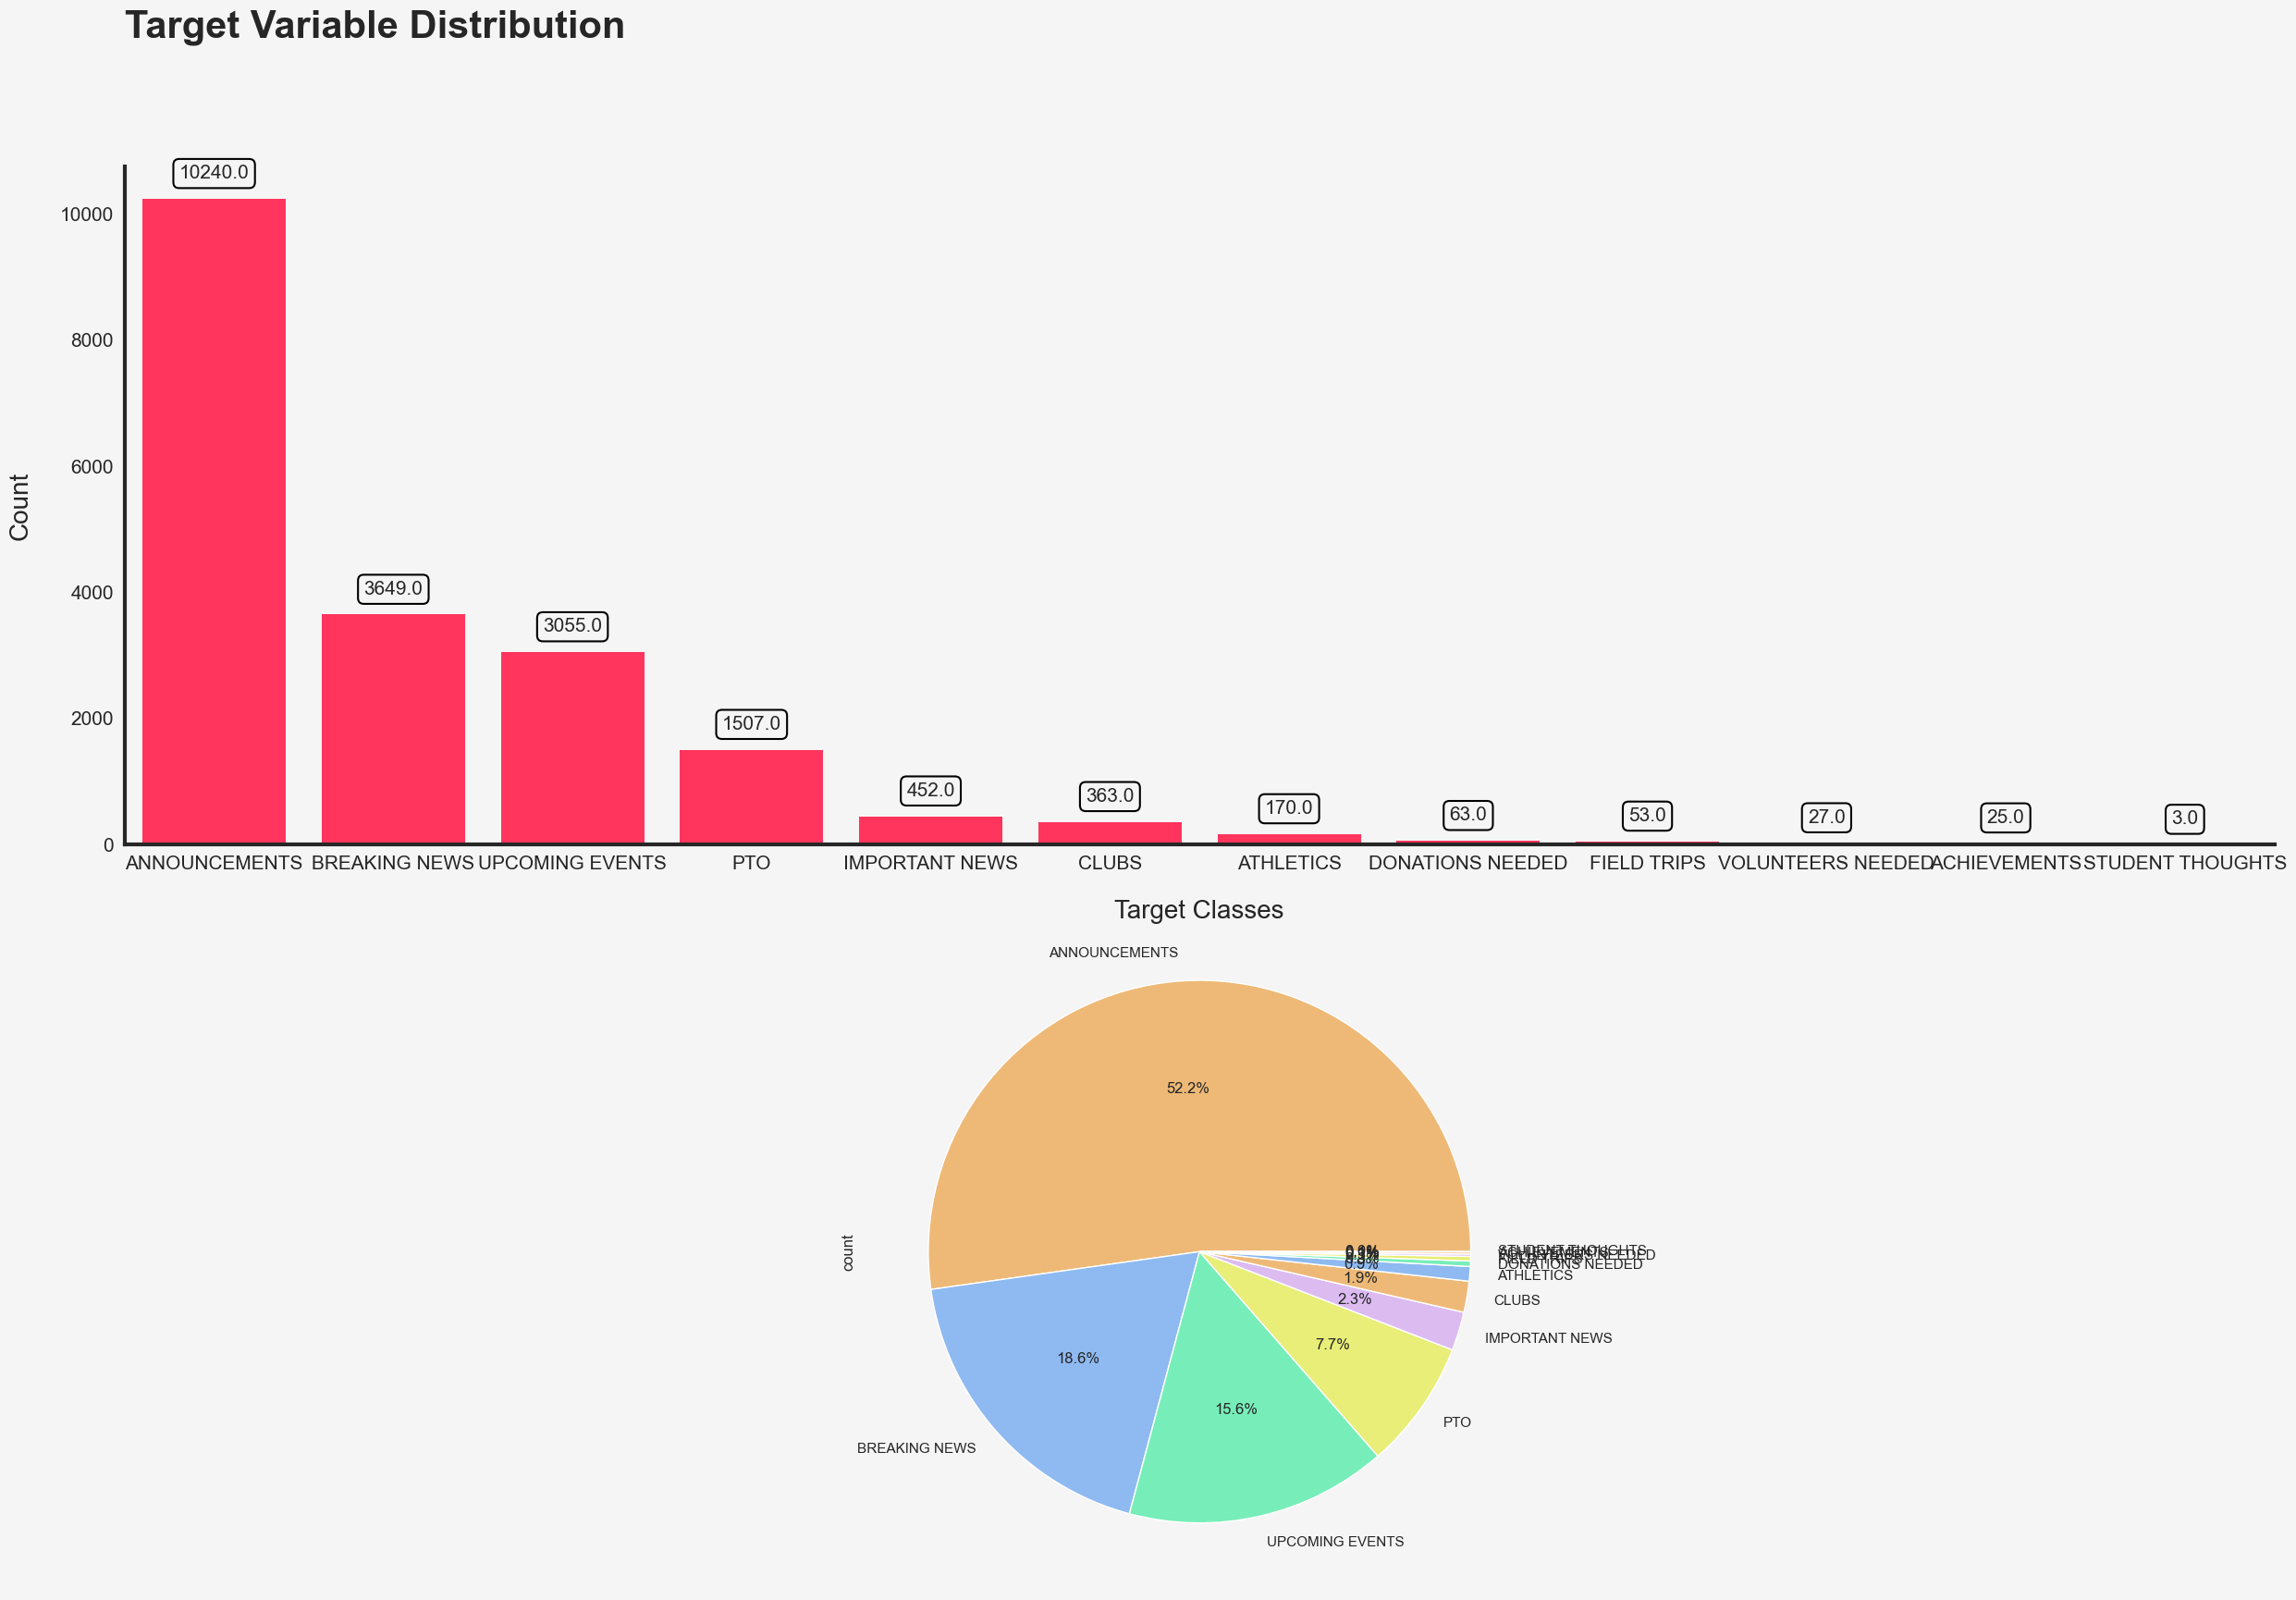

In [6]:
background_color = "#f6f5f5"
fig = plt.figure(figsize=(30, 20), facecolor='#f6f5f5')

gs = fig.add_gridspec(2, 1)
gs.update(wspace=0.4, hspace=0.1)


ax1 = fig.add_subplot(gs[0, 0])
ax1.set_facecolor(background_color)
ax2 = fig.add_subplot(gs[1, 0])
ax2.set_facecolor(background_color)


for s in ["right", "top"]:
    ax1.spines[s].set_visible(False)
for s in ["left", "bottom"]:
    ax1.spines[s].set_linewidth(3)



_ = sns.countplot(ax=ax1, x=data[target], zorder=2, linewidth=0, alpha=1, saturation=1, order = data[target].value_counts().index, palette=['#ff355d']*100)

_.tick_params(labelsize=15, width=1, length=5)


#--------- Code For Percentage on the top of count bars ---------
for p in ax1.patches:
    percentage = f'{(p.get_height())}'
    x = p.get_x() +0.4
    y = p.get_height() + 400
    ax1.text(x, y, percentage, ha='center', va='center', fontsize=15,
             bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=1.5))
     
_ = ax1.set_xlabel("Target Classes", ha='center', va='center', fontsize=20, labelpad = 30)
_ = ax1.set_ylabel("Count", ha='center', va='center', fontsize=20, labelpad = 30)

#-------------------------
sns.set_palette(["#eeb977","#8ebaf1", "#77eeb9", "#e8ee77", '#dcbbf1']*100)
_ = data[target].value_counts().plot.pie(ax = ax2, autopct = '%1.1f%%')


_= fig.text(0.125, 0.95,"Target Variable Distribution", fontsize=30, weight='bold')

<a id = "3.4"></a>

### 3.4 Missing Values In The Dataset

In [7]:
data.isna().sum()

title              10
body                3
signature         400
submissiontime      0
category            0
dtype: int64

**For all the missing values in `title` and `signature`, we will put a constant value for all instances instead of dropping them**

**And we will drop the instance which has missing value in `body`.**

In [8]:
data.loc[ ( data['title'].isna()), 'title'] = 'No Title'
data.loc[ ( data['signature'].isna()), 'signature'] = 'No Signature'


data = data.dropna()

<a id = "3.5"></a>

### 3.5 Observations

- There are 19607 rows with 5 columns
- `body` contains the the main content of the email. 
- Almost half (52%) of the instances are have target variable as `Announcement`. Followed by 18% as `Breaking News`.
- There were 400 missing values in `signature` and 20 in `title`.

---
<a id = '4'></a>
# 4. Univariate Analysis

[back to top](#table-of-contents)
<a id="table-of-contents"></a>


<a id = "4.1"></a>
### 4.1 Number of Unique Values in Each Column

In [9]:
features = [col for col in data.columns if col not in [target]]

In [10]:
temp = pd.DataFrame(data[features].nunique(), columns=['Number of unique values'])

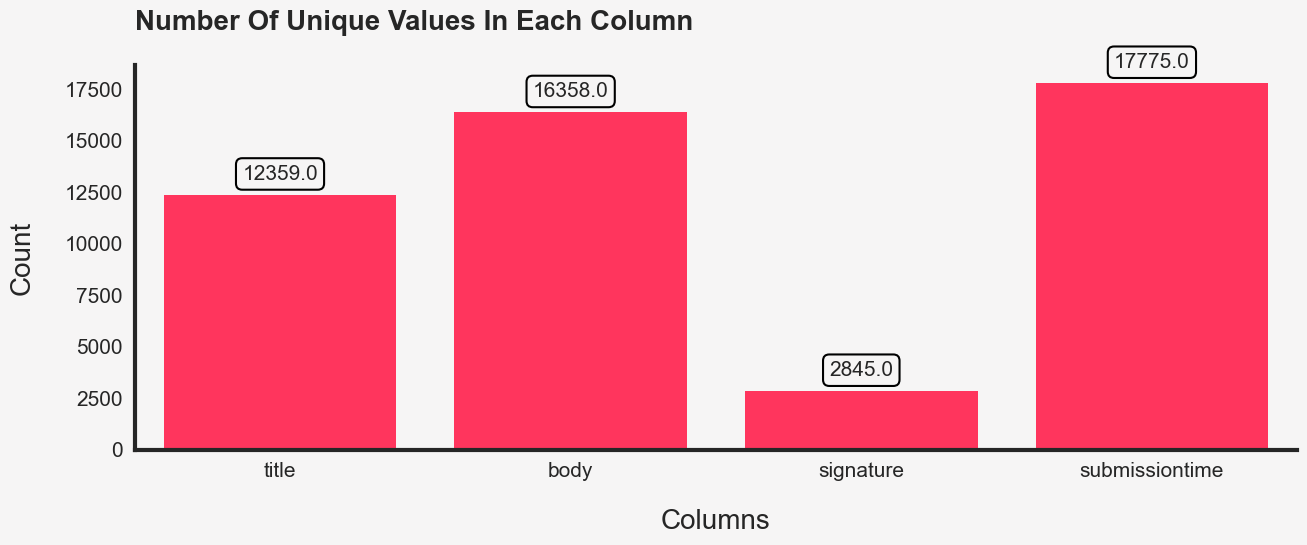

In [11]:
background_color = "#f6f5f5"
fig = plt.figure(figsize=(15, 5), facecolor='#f6f5f5')

gs = fig.add_gridspec(1, 1)
gs.update(wspace=0.4, hspace=0.1)


ax1 = fig.add_subplot(gs[0, 0])
ax1.set_facecolor(background_color)


for s in ["right", "top"]:
    ax1.spines[s].set_visible(False)
for s in ["left", "bottom"]:
    ax1.spines[s].set_linewidth(3)

_ = sns.barplot(data = temp, y = temp['Number of unique values'], x = temp.index, zorder=2, linewidth=0, alpha=1, saturation=1, palette=['#ff355d']*100
)

_.tick_params(labelsize=15, width=1, length=5)


#--------- Code For Percentage on the top of count bars ---------
for p in ax1.patches:
    percentage = f'{(p.get_height())}'
    x = p.get_x() +0.4
    y = p.get_height() + 1000
    ax1.text(x, y, percentage, ha='center', va='center', fontsize=15,
             bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=1.5))
     
_ = ax1.set_xlabel("Columns", ha='center', va='center', fontsize=20, labelpad = 30)
_ = ax1.set_ylabel("Count", ha='center', va='center', fontsize=20, labelpad = 30)

#-------------------------
sns.set_palette(["#eeb977","#8ebaf1", "#77eeb9", "#e8ee77", '#dcbbf1']*100)
_ = data[target].value_counts().plot.pie(ax = ax2, autopct = '%1.1f%%')


_= fig.text(0.125, 0.95,"Number Of Unique Values In Each Column", fontsize=20, weight='bold')


<a id = "4.2"></a>

### 4.2 Characters in the Body

In [12]:
data['character count'] = data['body'].apply(lambda x: len(str(x)))

In [13]:
data[ data['character count'] <= 1]

,title,body,signature,submissiontime,category,character count
895,Earth Day is coming up and we have T Shirts.,.,Natiqua Riley,3/19/16 1:53 PM,UPCOMING EVENTS,1
896,Earth Day is coming up and we have T Shirts.,.,Natiqua Riley,3/19/16 1:53 PM,UPCOMING EVENTS,1
972,"Enjoy your time off. We will see you April 5, ...",.,Natiqua Riley,3/26/16 9:09 PM,UPCOMING EVENTS,1
973,"Enjoy your time off. We will see you April 5, ...",.,Natiqua Riley,3/26/16 9:09 PM,UPCOMING EVENTS,1
1330,JUST FOR YOU,.,No Signature,5/5/16 3:48 PM,BREAKING NEWS,1
...,...,...,...,...,...,...
19537,Join the PTO,.,L. Watkis (Assistant Principal),12/9/22 8:55 PM,ANNOUNCEMENTS,1
19550,Parent University,.,L. Watkis (Assistant Principal),12/14/22 6:34 PM,PTO,1
19551,Lost and Found,.,L. Watkis (Assistant Principal),12/14/22 6:36 PM,ANNOUNCEMENTS,1
19552,Be a Volunteer,.,L. Watkis (Assistant Principal),12/14/22 6:38 PM,ANNOUNCEMENTS,1


- **As we can see above, for these instances, the `body` part has just a `.` in it, So we will just use the title as our `body`.**

- **So now we will clear this inconsistancy.**


In [14]:
index = data[ data['character count'] == 1].index

In [15]:
data.loc[index, 'body'] = data.loc[index]['title']

- **Now again we will take character count**

In [16]:
data['character count'] = data['body'].apply(lambda x: len(str(x)))

**Let's check for more inconsistancies**

In [17]:
data.isna().sum()

title              0
body               0
signature          0
submissiontime     0
category           0
character count    0
dtype: int64

In [18]:
data[ data['character count'] < 10]

,title,body,signature,submissiontime,category,character count
1649,No Title,We run,Danica Justsen,6/14/16 2:17 PM,BREAKING NEWS,6
1650,No Title,We run,Danica Justsen,6/14/16 2:17 PM,BREAKING NEWS,6
1960,Fifth Grade Schedule,FYI,Lesma Watson Watkis,9/1/16 3:04 PM,ANNOUNCEMENTS,3
6475,High School Science Olympiad,See Below,Ashish Vadalia,2/28/18 4:00 PM,BREAKING NEWS,9
7098,Beach Bash,See flyer,Vernon Kwiatkowski,5/29/18 3:38 PM,UPCOMING EVENTS,9
10689,Back to School Night,Welcome!,L. Watkis (Assistant Principal),9/6/19 12:19 PM,ANNOUNCEMENTS,8
10794,The School Pledge,Pledge,L. Watkis (Assistant Principal),9/14/19 9:11 AM,BREAKING NEWS,6
12473,,,#NAME?,2/21/20 1:54 PM,PTO,1
12539,Black History Program,Awesome!,"Dr. Washington, Principal",2/28/20 2:58 PM,IMPORTANT NEWS,8
14639,No Title,No Title,No Signature,1/29/21 9:28 AM,ANNOUNCEMENTS,8


**Here are the instance which has less than 10 characters in the body we can see that all the body instances makes no sense. So we will just drop them.**

In [19]:
index = data[ data['character count'] < 10].index

data.drop(index=index, axis = 0, inplace=True)

In [20]:
data['character count'].describe()

count    19584.000000
mean       813.175551
std        737.651782
min         10.000000
25%        344.000000
50%        616.000000
75%       1057.000000
max      18393.000000
Name: character count, dtype: float64

In [21]:
data['character count'].value_counts()

character count
271     53
189     51
311     50
307     49
1211    39
        ..
2438     1
2809     1
2889     1
1455     1
3570     1
Name: count, Length: 2670, dtype: int64

**Lets plot first 20 value counts**

In [22]:
temp = pd.DataFrame(data['character count'].value_counts()[:20])

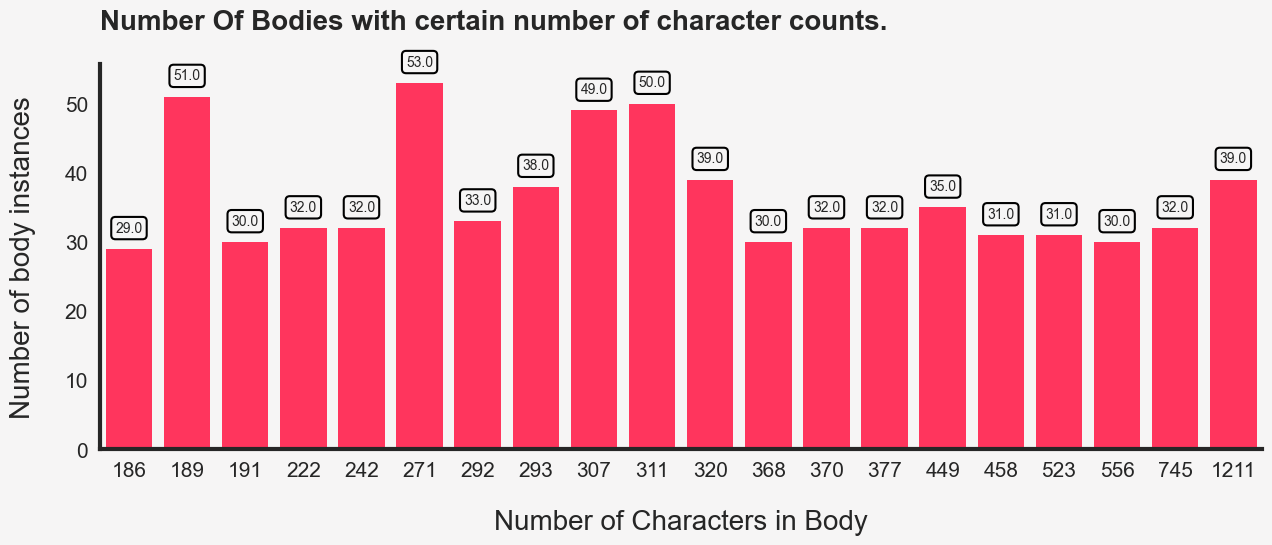

In [23]:
background_color = "#f6f5f5"
fig = plt.figure(figsize=(15, 5), facecolor='#f6f5f5')

gs = fig.add_gridspec(1, 1)
gs.update(wspace=0.4, hspace=0.1)


ax1 = fig.add_subplot(gs[0, 0])
ax1.set_facecolor(background_color)


for s in ["right", "top"]:
    ax1.spines[s].set_visible(False)
for s in ["left", "bottom"]:
    ax1.spines[s].set_linewidth(3)

_ = sns.barplot(data = temp, y = temp['count'], x = temp.index, zorder=2, linewidth=0, alpha=1, saturation=1, palette=['#ff355d']*100
)

_.tick_params(labelsize=15, width=1, length=5)


#--------- Code For Percentage on the top of count bars ---------
for p in ax1.patches:
    percentage = f'{(p.get_height())}'
    x = p.get_x() +0.4
    y = p.get_height() + 3
    ax1.text(x, y, percentage, ha='center', va='center', fontsize=10,
             bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=1.5))
     
_ = ax1.set_xlabel("Number of Characters in Body", ha='center', va='center', fontsize=20, labelpad = 30)
_ = ax1.set_ylabel("Number of body instances", ha='center', va='center', fontsize=20, labelpad = 30)

#-------------------------
sns.set_palette(["#eeb977","#8ebaf1", "#77eeb9", "#e8ee77", '#dcbbf1']*100)
_ = data[target].value_counts().plot.pie(ax = ax2, autopct = '%1.1f%%')


_= fig.text(0.125, 0.95,"Number Of Bodies with certain number of character counts.", fontsize=20, weight='bold')


<a id = "4.3"></a>

### 4.3 Countplot for total words in the mail

In [24]:
data['word count'] = data['body'].apply(lambda x: len(x.split()))

In [25]:
data['word count'].describe()

count    19584.000000
mean       127.822815
std        114.831708
min          1.000000
25%         54.000000
50%         98.000000
75%        166.000000
max       2765.000000
Name: word count, dtype: float64

In [26]:
data['word count'].value_counts()[:20]

word count
50    169
57    165
51    147
59    140
18    139
64    132
72    131
74    130
56    130
48    130
82    129
73    127
40    127
62    127
83    126
44    125
24    124
77    121
37    120
65    120
Name: count, dtype: int64

In [27]:
data[data['word count']<=1]

,title,body,signature,submissiontime,category,character count,word count
8065,3 Phrases Every Student Needs To Hear,https://info.character.org/blog/3-phrases-ever...,"Graciously, Your School Counselor [Mrs. Whit...",10/17/18 1:03 PM,ANNOUNCEMENTS,69,1
8392,"Rude, Mean or Bullying?",https://www.amightygirl.com/blog?p=20215,"Graciously, Your School Counselor [Mrs. Whit...",11/8/18 1:20 PM,ANNOUNCEMENTS,40,1
8395,"R-E-S-P-E-C-T, find out what it means...for AL...",https://www.psychologytoday.com/us/blog/the-po...,"Graciously, Your School Counselor [Mrs. Whit...",11/8/18 2:18 PM,ANNOUNCEMENTS,92,1
8761,Our Weekly PTO Newsletter!,https://conta.cc/2S6SnYE,The CMIT PTO Board,12/14/18 3:08 PM,PTO,24,1
8889,Five Ways to Nurture Compassion in Kids,https://www.kqed.org/mindshift/52787/five-ways...,"Graciously, Your School Counselor [Mrs. Whit...",1/7/19 1:13 PM,ANNOUNCEMENTS,194,1
...,...,...,...,...,...,...,...
18377,STEMAZING EVENT,https://www.eventbrite.com/e/fire-stem-21-22-e...,Program Coordinator,5/11/22 5:24 PM,UPCOMING EVENTS,90,1
18438,STEMAZING EVENT,https://www.eventbrite.com/e/fire-stem-21-22-e...,Program Coordinator,5/20/22 7:31 AM,UPCOMING EVENTS,90,1
18911,Ms. Stewart's Math Updates,Greetings!,Witayuna Stewart,9/19/22 5:24 PM,ANNOUNCEMENTS,12,1
19453,Book Nook,https://20320602.fs1.hubspotusercontent-na1.ne...,L. Watkis (Assistant Principal),11/18/22 8:41 PM,PTO,158,1


**Here we can see that some of the body instances has only urls.**

**With this information, we can create a binary feature which indicate that the body contains only url.**

In [28]:
temp = pd.DataFrame(data['word count'].value_counts()[:20])

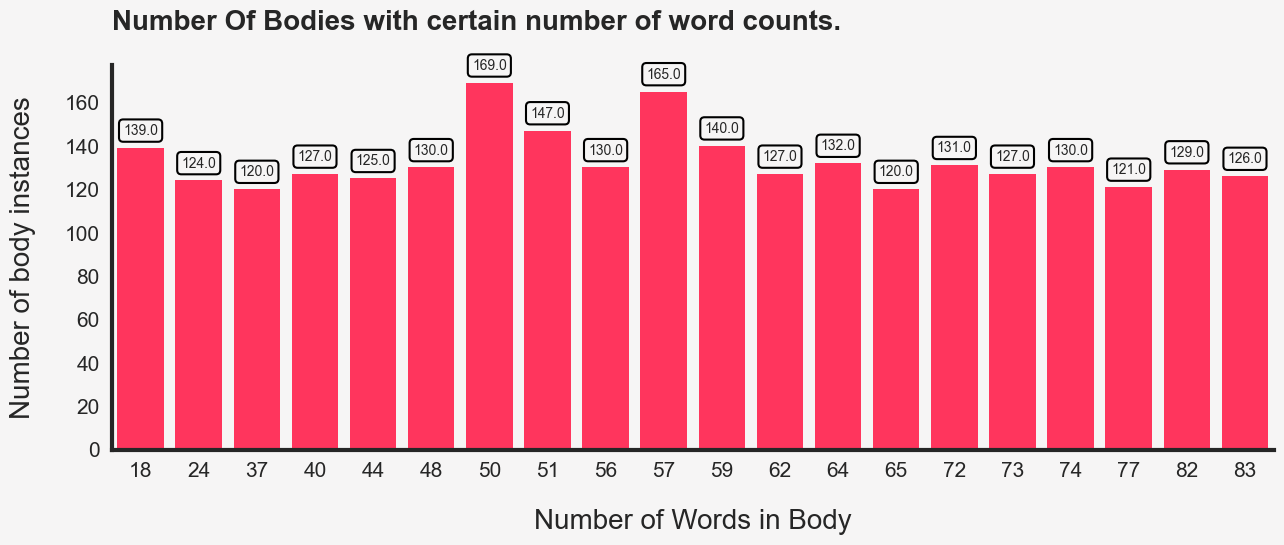

In [29]:
background_color = "#f6f5f5"
fig = plt.figure(figsize=(15, 5), facecolor='#f6f5f5')

gs = fig.add_gridspec(1, 1)
gs.update(wspace=0.4, hspace=0.1)


ax1 = fig.add_subplot(gs[0, 0])
ax1.set_facecolor(background_color)


for s in ["right", "top"]:
    ax1.spines[s].set_visible(False)
for s in ["left", "bottom"]:
    ax1.spines[s].set_linewidth(3)

_ = sns.barplot(data = temp, y = temp['count'], x = temp.index, zorder=2, linewidth=0, alpha=1, saturation=1, palette=['#ff355d']*100
)

_.tick_params(labelsize=15, width=1, length=5)


#--------- Code For Percentage on the top of count bars ---------
for p in ax1.patches:
    percentage = f'{(p.get_height())}'
    x = p.get_x() +0.4
    y = p.get_height() + 8
    ax1.text(x, y, percentage, ha='center', va='center', fontsize=10,
             bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=1.5))
     
_ = ax1.set_xlabel("Number of Words in Body", ha='center', va='center', fontsize=20, labelpad = 30)
_ = ax1.set_ylabel("Number of body instances", ha='center', va='center', fontsize=20, labelpad = 30)

#-------------------------
sns.set_palette(["#eeb977","#8ebaf1", "#77eeb9", "#e8ee77", '#dcbbf1']*100)
_ = data[target].value_counts().plot.pie(ax = ax2, autopct = '%1.1f%%')


_= fig.text(0.125, 0.95,"Number Of Bodies with certain number of word counts.", fontsize=20, weight='bold')


<a id = "4.4"></a>

### 4.4 Time Series Plot

In [30]:
data['submissiontime'] = pd.to_datetime(data['submissiontime'])

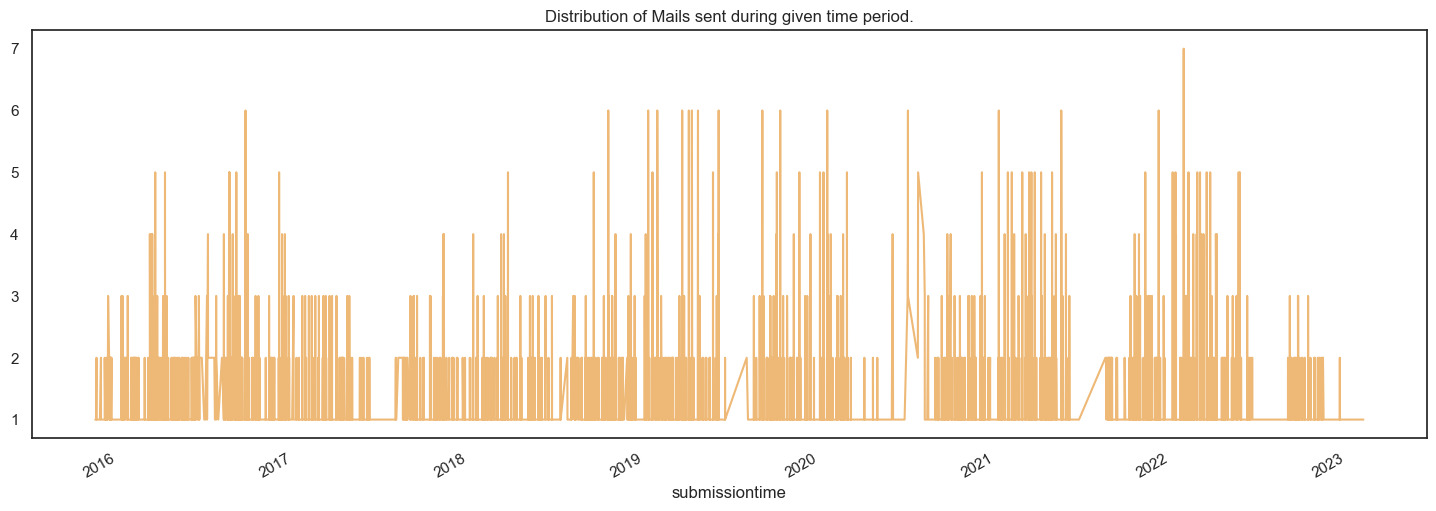

In [31]:
_ = data.sort_values(by = 'submissiontime').groupby('submissiontime').size().rename('train').plot(figsize=(18, 6), title = 'Distribution of Mails sent during given time period.')


<a id = "4.5"></a>

### 4.5 Wordcloud for Body

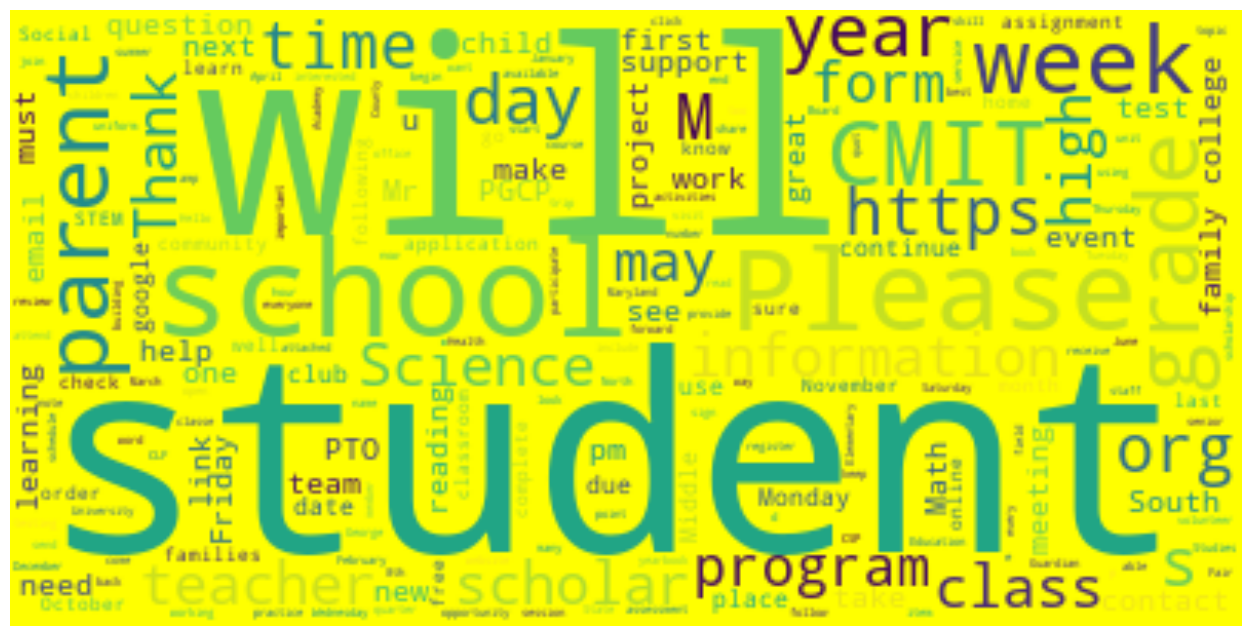

In [32]:

text = " ".join(mail for mail in data.body)

plt.figure(figsize = (20, 8))
word_cloud = WordCloud(collocations = False, background_color = 'Yellow').generate(text)

plt.imshow(word_cloud, interpolation='bilinear')

plt.axis("off")

plt.show()


<a id = "4.6"></a>

### 4.6 Univariate Analysis Observations

- `signature` has 2845 unique values which mean many of the mails have single source. 
- `body` has 16358 unique values which means some of the mails are sent repeatedly.
- Maximum and minimum count of characters in a mail are 18393 and 10 respectively.
- Maximum and minimum count of words  in a mail are 2765 and 1 respectively.

---
<a id = '5'></a>
# 5. Bivariate Analysis Analysis

[back to top](#table-of-contents)
<a id="table-of-contents"></a>


<a id = "5.1"></a>
### 5.1 Character and Word Count w.r.t. Target Variable

In [33]:
data['avg characters'] = data.groupby(target)['character count'].transform('mean')
data['avg words'] = data.groupby(target)['word count'].transform('mean')

In [34]:
data['avg characters'] = data['avg characters'].round()
data['avg words'] = data['avg words'].round()

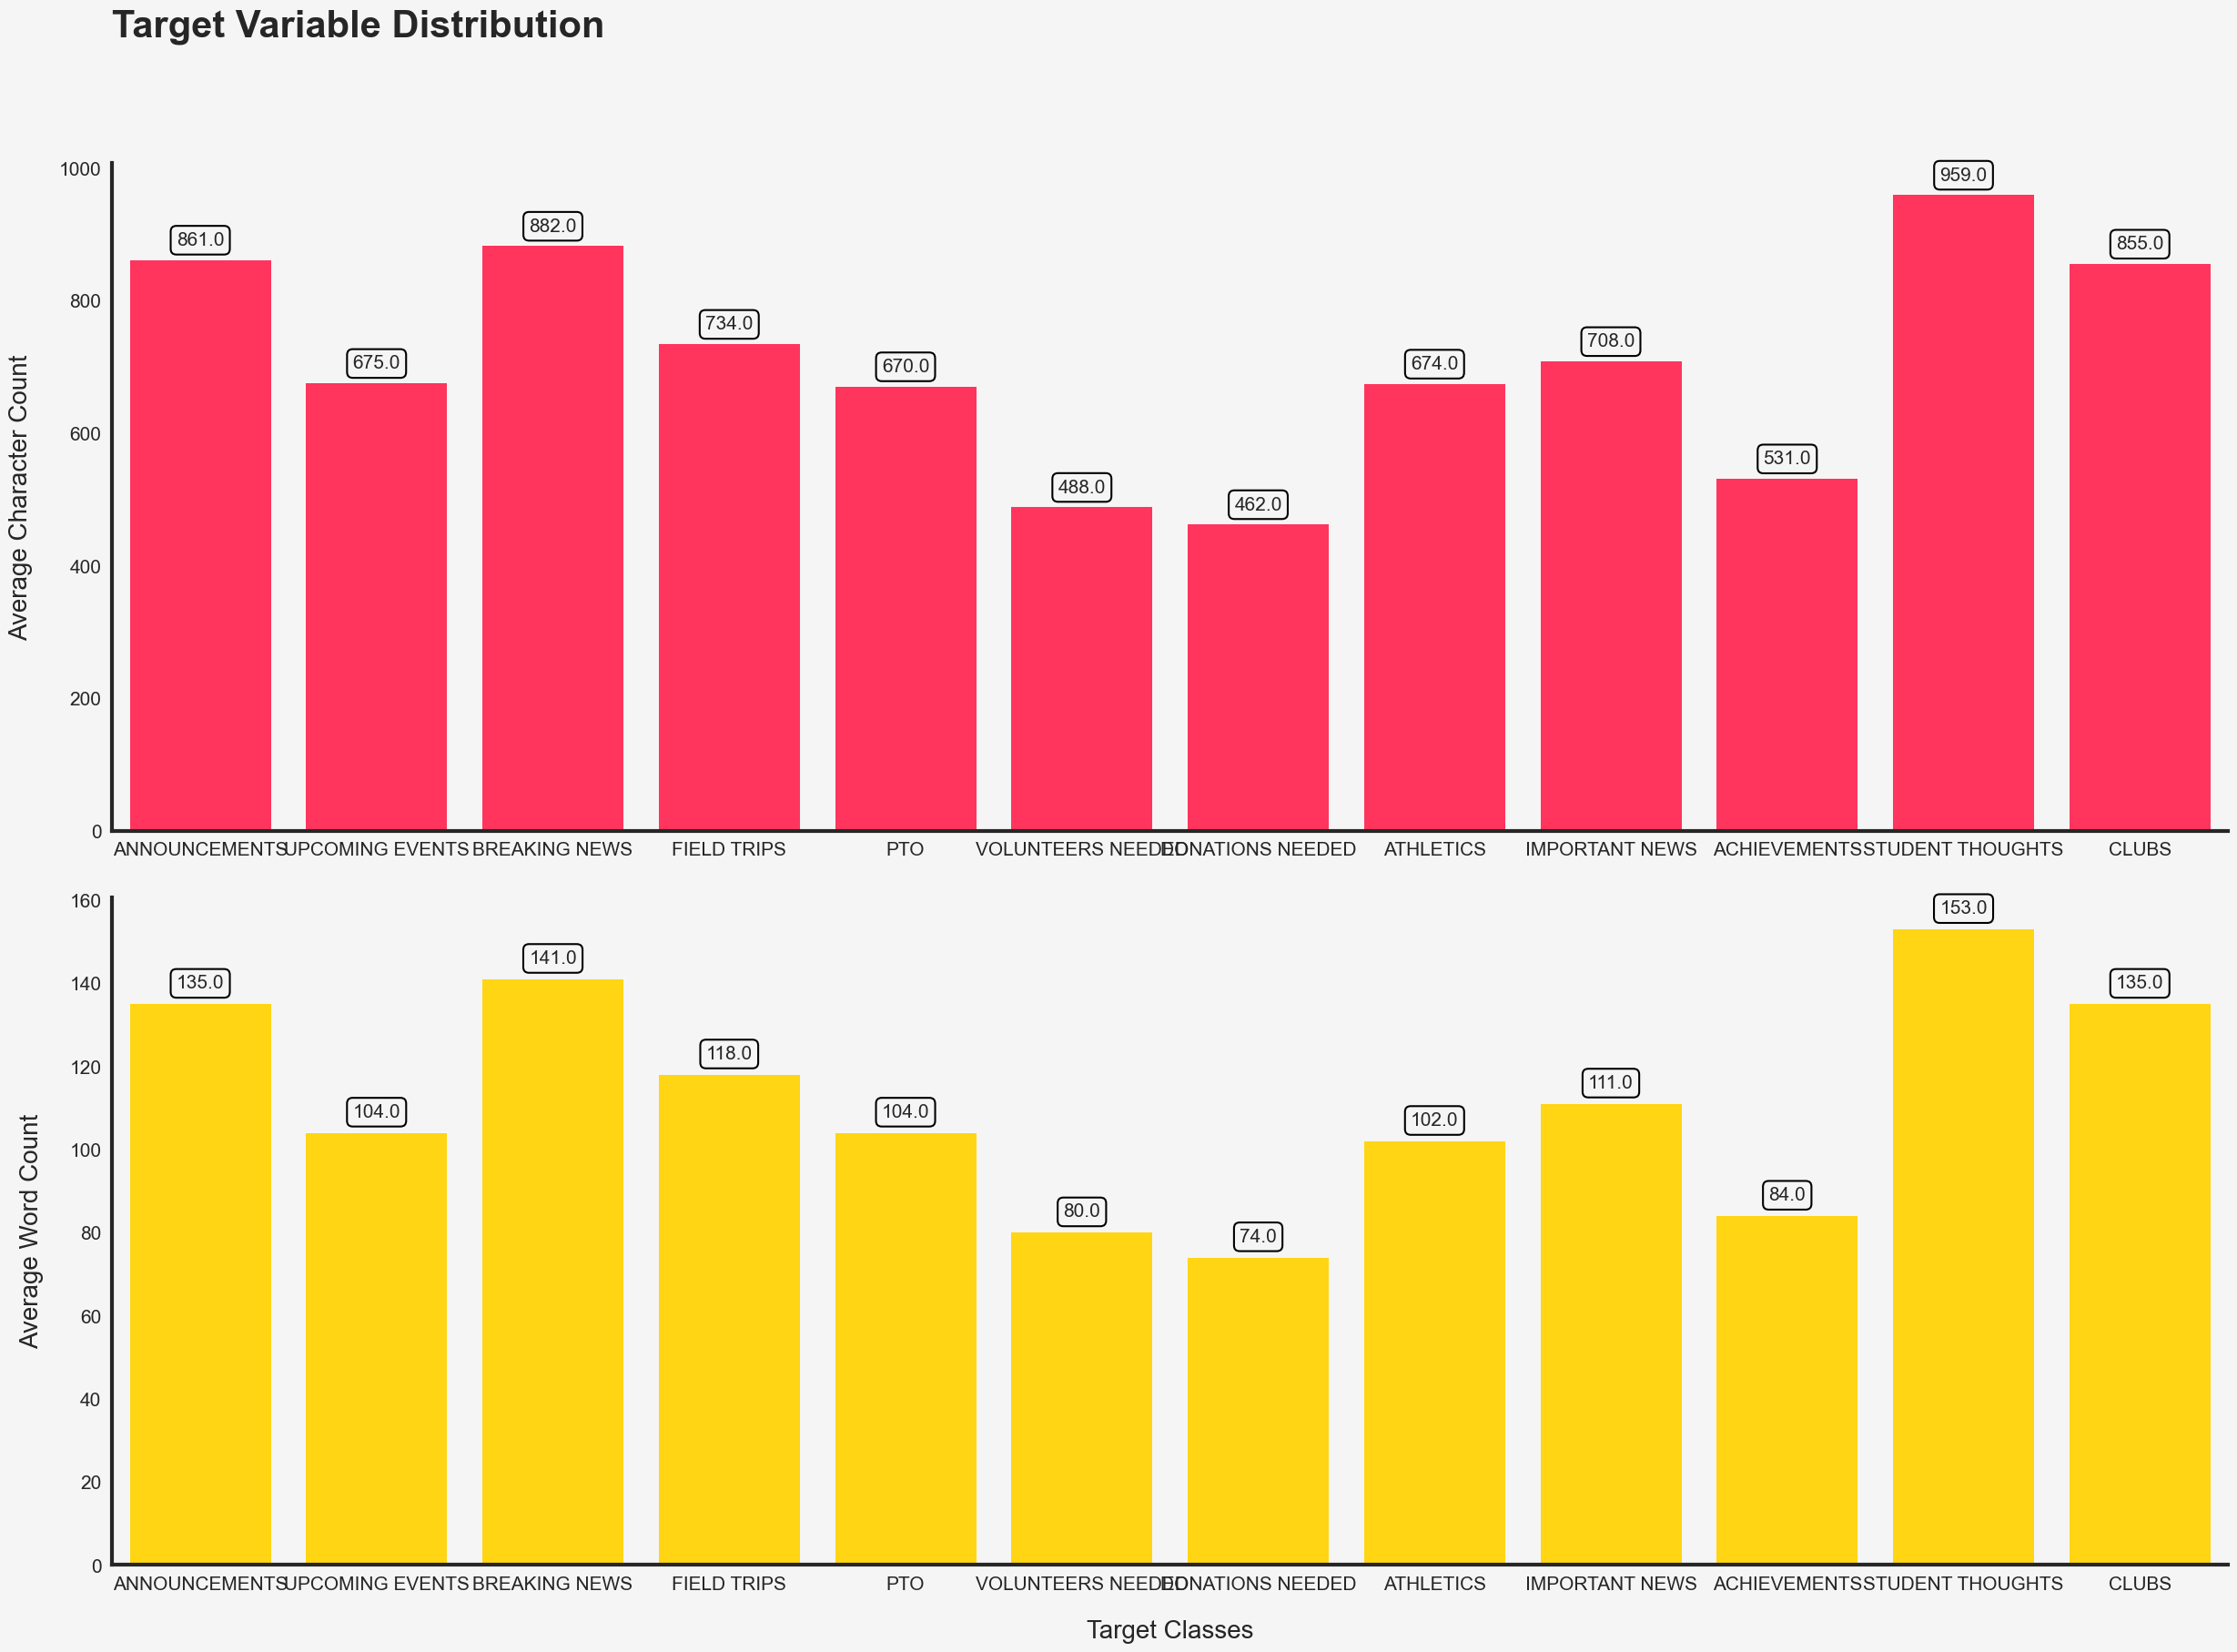

In [35]:
background_color = "#f6f5f5"
fig = plt.figure(figsize=(30, 20), facecolor='#f6f5f5')

gs = fig.add_gridspec(2, 1)
gs.update(wspace=0.4, hspace=0.1)


ax1 = fig.add_subplot(gs[0, 0])
ax1.set_facecolor(background_color)
ax2 = fig.add_subplot(gs[1, 0])
ax2.set_facecolor(background_color)


for s in ["right", "top"]:
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
for s in ["left", "bottom"]:
    ax1.spines[s].set_linewidth(3)
    ax2.spines[s].set_linewidth(3)



_ = sns.barplot(ax=ax1, x=data[target], y = data['avg characters'], zorder=2, linewidth=0, alpha=1, saturation=1, palette=['#ff355d']*100)

_.tick_params(labelsize=15, width=1, length=5)


#--------- Code For Percentage on the top of count bars ---------
for p in ax1.patches:
    percentage = f'{(p.get_height())}'
    x = p.get_x() +0.4
    y = p.get_height() + 30
    ax1.text(x, y, percentage, ha='center', va='center', fontsize=15,
             bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=1.5))
     
_ = ax1.set_xlabel("")
_ = ax1.set_ylabel("Average Character Count", ha='center', va='center', fontsize=20, labelpad = 30)

#------------------------- Plot 2

_ = sns.barplot(ax=ax2, x=data[target], y = data['avg words'], zorder=2, linewidth=0, alpha=1, saturation=1, palette=['#ffd514']*100)

_.tick_params(labelsize=15, width=1, length=5)


#--------- Code For Percentage on the top of count bars ---------
for p in ax2.patches:
    percentage = f'{(p.get_height())}'
    x = p.get_x() +0.4
    y = p.get_height() + 5
    ax2.text(x, y, percentage, ha='center', va='center', fontsize=15,
             bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=1.5))
     
_ = ax2.set_xlabel("Target Classes", ha='center', va='center', fontsize=20, labelpad = 30)
_ = ax2.set_ylabel("Average Word Count", ha='center', va='center', fontsize=20, labelpad = 30)


_= fig.text(0.125, 0.95,"Target Variable Distribution", fontsize=30, weight='bold')

<a id = "5.2"></a>
### 5.2 Word Cloud For Body w.r.t. target Variable

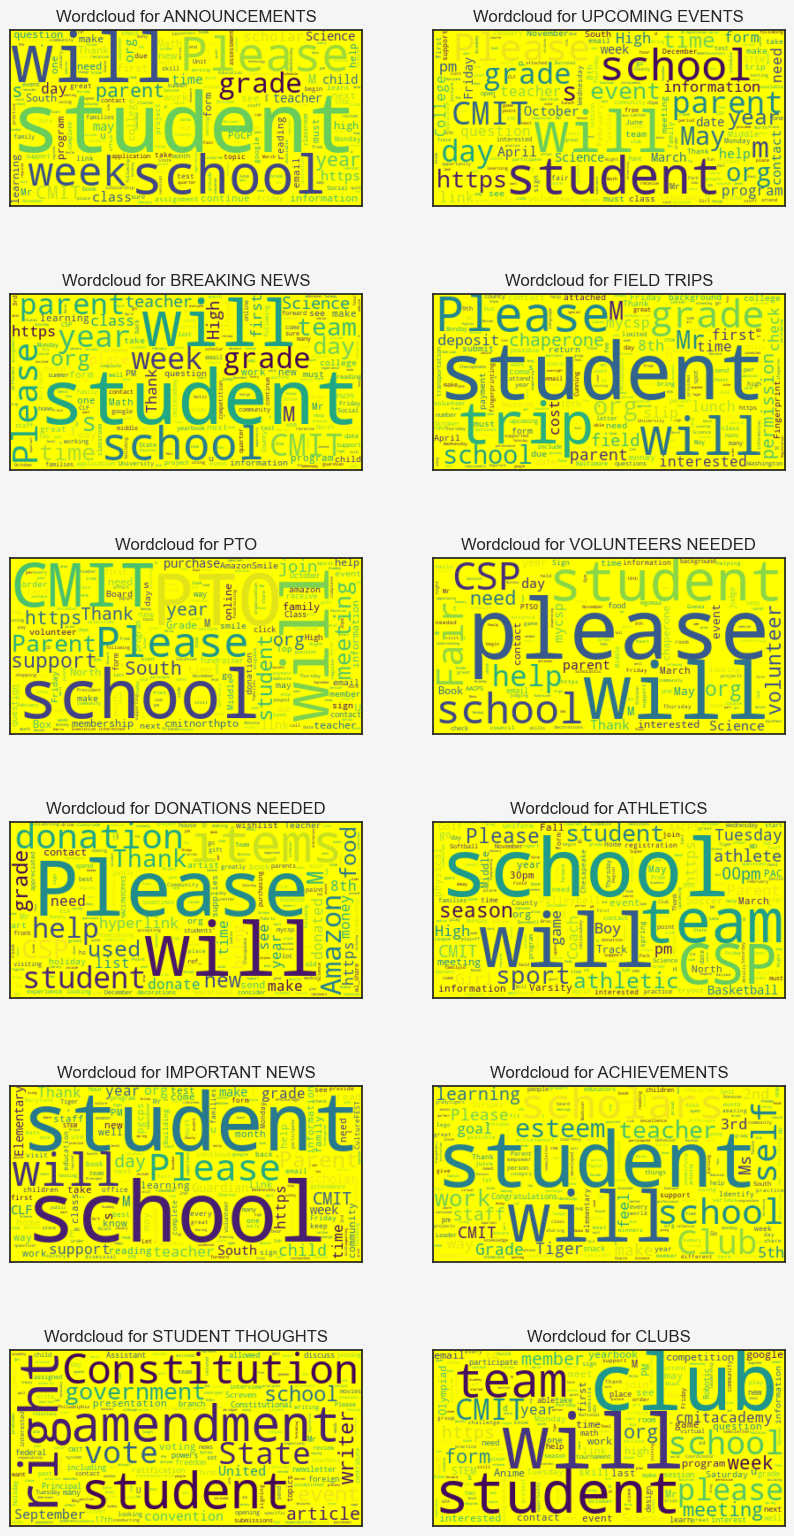

In [36]:
f, ax = plt.subplots(6, 2, figsize = (10, 20),  facecolor='#f6f5f5')

axx = ax.flatten()

for index, tar in enumerate(data[target].unique()):
    temp = data[ data[target] == tar].copy()
    text = " ".join(mail for mail in temp.body)
    word_cloud = WordCloud(collocations = False, background_color = 'Yellow').generate(text)
    axx[index].xaxis.set_tick_params(labelbottom=False)
    axx[index].yaxis.set_tick_params(labelleft=False)
    axx[index].set_facecolor(background_color)
    axx[index].imshow(word_cloud, interpolation='bilinear')
    axx[index].set_title(f"Wordcloud for {tar}")

<a id = "5.3"></a>
### 5.3 Observations From Bivariate Analysis

##### Character Count
- By observing the target variable distribution the highest average character count in the mail is 959 for the category type student thoughts
- The lowest average character count in the mail is 462 for the category type Donations needed

##### Word Count
- By observing the target variable distribution the maximum average word count in the mail is 153 for the category type student thoughts
- the least average word count in the mail is 74 for the category type student thoughts

##### Word Clouds
- When we observe the wordclouds, For the maximum categories including Announcement, Breaking news, Field trips, Volunteers needed, Achievements, Student thoughts, Clubs, the most significant word is 'student'

---
<a id = '6'></a>
# 6. Data Cleaning

[back to top](#table-of-contents)
<a id="table-of-contents"></a>


<a id = "6.1"></a>
### 6.1 Removing Punctuations

In [37]:
def remove_punct(test_str):
    res = re.sub(r'[^\w\s]', '', test_str)
    return res



data['body']=data['body'].apply(lambda x : remove_punct(x))


<a id = "6.2"></a>
### 6.2 Removing Stopwords

In [39]:
# stop_words = set(stopwords.words('english'))

# def remove_stopwords(text):
#     word_tokens = word_tokenize(text)
#     filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
#     return ' '.join(filtered_sentence)
    


# data['body']=data['body'].apply(lambda x : remove_stopwords(x))


<a id = "6.3"></a>
### 6.3 Removing Extra Spaces

In [40]:
def remove_extra_spaces(text):
    sentence = " ".join(text.split())
    return sentence

data['body']=data['body'].apply(lambda x : remove_extra_spaces(x))

---
<a id = '7'></a>
# 7. Machine Learning
[back to top](#table-of-contents)
<a id="table-of-contents"></a>


<a id = "7.1"></a>
### 7.1 Metrics Selection

- **Since target variable is unbalanced we cannot use  `Accuracy` as our scoring matrics.**

- **For this problem statement we have decided to use `Precision` as our evaluation metrics.**

- **Precision basically tell us `what proportion of predicted positives are truly positive`.**

<a id = "7.2"></a>
### 7.2 Feature Engineering

In [41]:
def feature_engineering():
    global data
    
    # Does the mail contains URL
    data['is_url'] = data['body'].apply(lambda x: 1 if 'http' in x else 0)
    
    # Signature Honorifics
    data['signature honor'] = data['signature'].apply(lambda x: x.split('.')[0] if '.' in x else x)

    # Unique word count
    data['unique word count'] = data['body'].apply(lambda x: len(set(x.split())))

    # Number of title occurance
    data['title count'] = data.groupby('title')['body'].transform('count')

    # Number of body occurance
    data['body count'] = data.groupby('body')['title'].transform('count')

    # Number of signature occurance
    data['signature count'] = data.groupby('signature')['body'].transform('count')

    ## Datetime features

    data['month'] = data['submissiontime'].dt.month
    data['dayofmonth'] = data['submissiontime'].dt.day
    data['dayoftheweek'] = data['submissiontime'].dt.dayofweek
    data['year'] = data['submissiontime'].dt.year
    data['hour'] = data['submissiontime'].dt.hour
    data['minute'] = data['submissiontime'].dt.minute
    data['weekday'] = data['submissiontime'].dt.weekday


    data.drop(columns=['submissiontime', 'title', 'signature'], axis = 1, inplace = True)

In [44]:
_ = feature_engineering()

<a id = "7.3"></a>
### 7.3 Label Encoding Target Variable

In [45]:
data[target] = data[[target]].apply(le.fit_transform)

In [46]:
data['signature honor'] = data[['signature honor']].apply(le.fit_transform)

<a id = "7.4"></a>
### 7.4 TF-IDF vectorization and Combining All Features

In [47]:
# creating a tdf-idf verctorizer
tfv = TfidfVectorizer(max_features=None, 
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3), use_idf=1,smooth_idf=1,sublinear_tf=1,
            stop_words = 'english')

In [48]:
%%time
x = tfv.fit_transform(data['body'])

CPU times: total: 7.36 s
Wall time: 7.35 s


In [301]:
x

<19584x1328413 sparse matrix of type '<class 'numpy.float64'>'
	with 3647774 stored elements in Compressed Sparse Row format>

**Combining tdf features with normal features**

In [49]:
# Features in the dataset
features = [col for col in data.columns if col not in [target, 'body', 'title', 'signature']]

In [52]:
# Converting pandas dataframe to sparse matrix
csr_matrix = csr_matrix(data[features].astype(pd.SparseDtype("float64",0)).sparse.to_coo())

In [53]:
csr_matrix

<19584x17 sparse matrix of type '<class 'numpy.float64'>'
	with 316288 stored elements in Compressed Sparse Row format>

In [54]:
# Combining tdf and normal features
processed_data = hstack((x, csr_matrix))

<a id = "7.5"></a>
### 7.5 Seperating Training - Testing - Validation Set

In [67]:
train, test, ytrain, ytest = train_test_split(x, data[target], 
                                                  stratify=data[target], 
                                                  random_state=42, 
                                                  test_size=0.2)

In [70]:
x_train, x_val, y_train, y_val = train_test_split(train, ytrain, 
                                                  stratify=ytrain, 
                                                  random_state=42, 
                                                  test_size=0.2)

- x_train : training set

- x_val : validation set

- y_train : traget for train set

- y_val : target for validation set

- test : test set

- ytest : target for test set

<a id = "7.6"></a>
### 7.6 Baseline Model Building

**Logistic Regression**

In [77]:
%%time

# Fitting a simple Logistic Regression on TFIDF

clf = LogisticRegression(n_jobs=-1)
clf.fit(x_train, y_train)
probs = clf.predict_proba(x_val)
predictions = clf.predict(x_val)

print(f"Precison is: {precision_score(y_val, predictions, average = 'weighted')}")

Precison is: 0.7003481526136187
CPU times: total: 0 ns
Wall time: 15.9 ms


**Random Forest**

In [80]:
%%time

# Fitting a simple Random Forest on TFIDF
clf = RandomForestClassifier(n_jobs=-1)
clf.fit(x_train, y_train)
probs = clf.predict_proba(x_val)
predictions = clf.predict(x_val)

print(f"Precison is: {precision_score(y_val, predictions, average = 'weighted')}")

Precison is: 0.7263454005610149
CPU times: total: 3h 23min 39s
Wall time: 18min 23s


**Lightgbm**

In [78]:
%%time

# Fitting a simple Logistic Regression on TFIDF
clf = LGBMClassifier(n_jobs=-1)
clf.fit(x_train, y_train)
probs = clf.predict_proba(x_val)
predictions = clf.predict(x_val)

print(f"Precison is: {precision_score(y_val, predictions, average = 'weighted')}")

Precison is: 0.6212869791287126
CPU times: total: 12min 21s
Wall time: 1min 9s


**XGBoost**

In [79]:
%%time

# Fitting a simple Logistic Regression on TFIDF
clf = XGBClassifier(n_jobs=-1)
clf.fit(x_train, y_train)
probs = clf.predict_proba(x_val)
predictions = clf.predict(x_val)

print(f"Precison is: {precision_score(y_val, predictions, average = 'weighted')}")

Precison is: 0.7036295759083344
CPU times: total: 34min 24s
Wall time: 3min 4s


**Since Lightgbm is taking much lesser time than other models, we will go forward with it.**

---
<a id = "7.7"></a>
### 7.7 Hyperparameter Tuning

In [ ]:
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200]
}

# Create a LightGBM model
model = LGBMClassifier(random_state=1999, n_jobs = -1)

# Create a GridSearchCV object to search over the parameter grid
grid_search = GridSearchCV(model, param_grid, scoring='precision')

# Fit the GridSearchCV object to the training data
grid_search.fit(x_train, y_train)

# Print the best hyperparameters found by the grid search
print("Best hyperparameters: ", grid_search.best_params_)

# Use the best model to make predictions on the test data and calculate the test AUC
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_val)
test_precision = precision_score(y_test, y_pred)

print("Test Precision: ", test_precision)

---
<a id = "7.9"></a>
### 7.9 Conclusion

- From this project we learned that data preprocessing is one of the important factor in building a good ML model. Also, we learned that feature engineering can improve the score significantly and also, creation of bad features can decrease the score. 